In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os

In [2]:
df = pd.read_csv(os.path.join(".", "Resources", "ufo-sightings.csv"))
df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,month,season,time of day,part of day
0,1/10/1947 20:00,conroe,tx,us,other,4,3 to4 sec.,The date was early 1947 before Arnold&#39s &qu...,4/16/2005,30.311667,-95.455833,1,Winter,8:00 PM,EVENING
1,1/10/1959 18:30,south san francisco,ca,us,disk,120,2 minutes,Its was approximately 6:30pm&#44 I was sitting...,4/27/2004,37.654722,-122.406667,1,Winter,6:30 PM,EVENING
2,1/10/1964 20:00,el cerrito (over old berkeley dump),ca,us,fireball,120,2 minutes,bal of fire in the sky no reported air crashes...,5/15/2006,37.915833,-122.310556,1,Winter,8:00 PM,EVENING
3,1/10/1980 0:00,exeter,nh,us,disk,7800,10min to 2hrs,saw what appeared as very bright star&#44 some...,2/18/2001,42.981389,-70.948333,1,Winter,12:00 AM,NIGHT
4,1/10/1981 20:30,glendora,ca,us,unknown,60,1 minute,On a very foggy night in 1981 I was illuminate...,2/18/2001,34.136111,-117.864444,1,Winter,8:30 PM,EVENING


In [3]:
df = df.drop(columns=["datetime", "city", "country", "shape", "duration (seconds)", "duration (hours/min)", "comments", "date posted", "latitude", "longitude ", "month", "time of day"])
df.head()

,state,season,part of day
0,tx,Winter,EVENING
1,ca,Winter,EVENING
2,ca,Winter,EVENING
3,nh,Winter,NIGHT
4,ca,Winter,EVENING


In [4]:
df['outcome'] = '1'


In [5]:
target = df["outcome"]
target.head()

0    1
1    1
2    1
3    1
4    1
Name: outcome, dtype: object

In [6]:
data = df.drop("outcome", axis=1)
feature_names = data.columns
data.head()

,state,season,part of day
0,tx,Winter,EVENING
1,ca,Winter,EVENING
2,ca,Winter,EVENING
3,nh,Winter,NIGHT
4,ca,Winter,EVENING


In [7]:
# Use Pandas get_dummies to convert categorical data

### BEGIN SOLUTION
data = pd.get_dummies(data)
data.head()
### END SOLUTION

,state_ak,state_al,state_ar,state_az,state_ca,state_co,state_ct,state_dc,state_de,state_fl,...,state_wy,season_ERROR,season_Fall,season_Spring,season_Summer,season_Winter,part of day_AFTERNOON,part of day_EVENING,part of day_MORNING,part of day_NIGHT
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

k: 1, Train/Test Score: 1.000/1.000
k: 3, Train/Test Score: 1.000/1.000
k: 5, Train/Test Score: 1.000/1.000
k: 7, Train/Test Score: 1.000/1.000
k: 9, Train/Test Score: 1.000/1.000
k: 11, Train/Test Score: 1.000/1.000
k: 13, Train/Test Score: 1.000/1.000
k: 15, Train/Test Score: 1.000/1.000
k: 17, Train/Test Score: 1.000/1.000
k: 19, Train/Test Score: 1.000/1.000


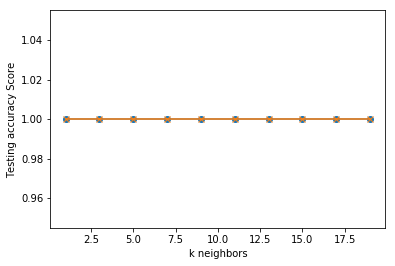

In [9]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [10]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test, y_test))

k=13 Test Acc: 1.000
